In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time 
from scipy.stats import norm, laplace
from scipy.stats import anderson_ksamp, ks_2samp, shapiro
from scipy.optimize import curve_fit

In [6]:
info = pd.read_csv("../csvs/random/Gaussian_Fits_266.csv", index_col=0)
info.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,1007,0.133196,5.587629,0.464593,0.014738,0.010563,2.423315e-08
1,1021,0.181262,6.003999,0.327314,0.010287,0.007410,5.811603e-09
2,1025,0.153687,5.794418,0.385985,0.012358,0.008756,1.170601e-08
3,1041,0.127597,5.730234,0.494415,0.015324,0.011150,2.919534e-08
4,10518,0.144064,6.465849,0.431597,0.013325,0.009608,1.638141e-08


In [8]:
significance_scores = pd.read_csv("../csvs/random/significance_scores.csv")
significance_scores.head()

,ID,Anderson_P,KS_P,ShapiroW
0,1601.0,0.000000e+00,1.541904e-66,0.000000e+00
1,1364.0,1.878066e+215,7.464849e-62,0.000000e+00
2,1829.0,4.539668e+168,3.195230e-60,0.000000e+00
3,2215.0,8.177321e+84,2.970647e-59,2.242078e-44
4,1819.0,2.200495e+85,7.786949e-45,1.401298e-45


In [9]:
ranked_scores = significance_scores.sort_values("KS_P", ascending=False)
ranked_scores.head()

,ID,Anderson_P,KS_P,ShapiroW
247,2081.0,0.793118,0.949235,2.675704e-02
246,19591.0,0.611337,0.883962,1.079304e-03
245,2087.0,0.648973,0.822841,2.619635e-05
244,2030.0,0.455353,0.787245,2.954231e-06
243,1169.0,0.409436,0.753047,1.806068e-13


In [25]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/random/random_features/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Sys_2081_1e8.csv', 'Sys_19591_1e8.csv', 'Sys_2087_1e8.csv', 'Sys_2030_1e8.csv', 'Sys_1169_1e8.csv', 'Sys_25_1e8.csv']


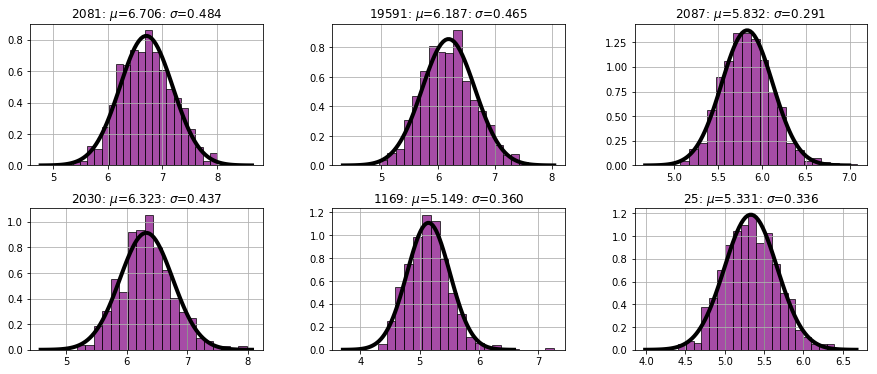

In [26]:
very_gaussian = ranked_scores.head(6)["ID"]
very_gaussian = ["Sys_{0}_1e8.csv".format(int(x))  for x in very_gaussian]
print (very_gaussian)
plot_random_hists(very_gaussian)